# Autoregressive study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras

In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [3]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [4]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))
step = 6

In [5]:
print(train_split)
print(train_split/6)

336440
56073.333333333336


In [6]:
past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [7]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

date_time_key = "Date Time"


In [8]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [9]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

print(train_data.shape)
print(val_data.shape)

(336440, 7)
(84111, 7)


## Univariate ARIMA fitting

In [10]:
x_temp = train_data[1]
print(x_temp.shape)
print(x_temp[:5])
train_data.head()

(336440,)
0   -2.014960
1   -2.061164
2   -2.073012
3   -2.049317
4   -2.044578
Name: 1, dtype: float64


,0,1,2,3,4,5,6
0,0.920682,-2.014960,-1.315987,-0.782129,-1.493220,2.243871,-0.727998
1,0.926670,-2.061164,-1.329360,-0.784270,-1.512196,2.294955,-0.929488
2,0.921879,-2.073012,-1.332035,-0.786410,-1.515992,2.305920,-1.273970
3,0.919484,-2.049317,-1.325348,-0.788551,-1.500811,2.279754,-1.176475
4,0.919484,-2.044578,-1.324011,-0.788551,-1.500811,2.275020,-1.189475


In [12]:
temp_ts = pd.Series(x_temp)

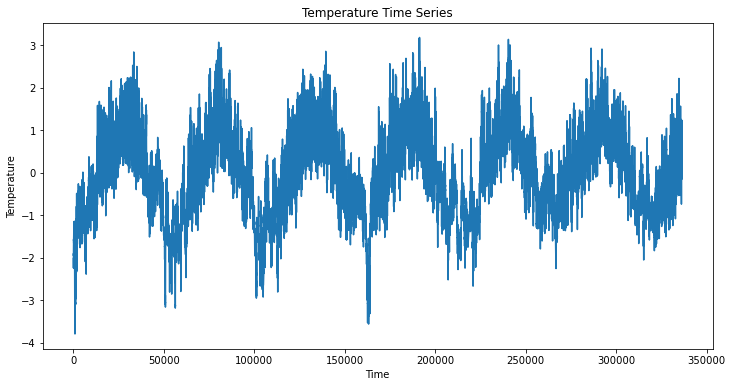

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(temp_ts)
plt.title('Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [13]:
# Convert the time series to a pandas DataFrame with a frequency of 10 minutes
df_ts = pd.DataFrame({
    'Time': df['Date Time'][:train_split],
    'Temperature': x_temp})
# Reset the index 
df_ts.set_index("Time", inplace=True)

df_ts

,Temperature
Time,
01.01.2009 00:10:00,-2.014960
01.01.2009 00:20:00,-2.061164
01.01.2009 00:30:00,-2.073012
01.01.2009 00:40:00,-2.049317
01.01.2009 00:50:00,-2.044578
...,...
24.05.2015 18:40:00,1.085504
24.05.2015 18:50:00,1.073657
24.05.2015 19:00:00,1.059440


In [14]:
df_ts.describe()

,Temperature
count,3.364400e+05
mean,5.519601e-16
std,1.000001e+00
min,-3.790884e+00
25%,-7.224084e-01
50%,-2.086655e-03
75%,7.206046e-01
max,3.183679e+00


We may compute a moving average of order 24*6 = 144 lags, in order to get a smoothed time series in terms of the days, since the difference among temperature during the day is negligent when studying a time interval of 10 years. Therefore, the smoothed time series is considered as follows: 

<AxesSubplot:xlabel='Time'>

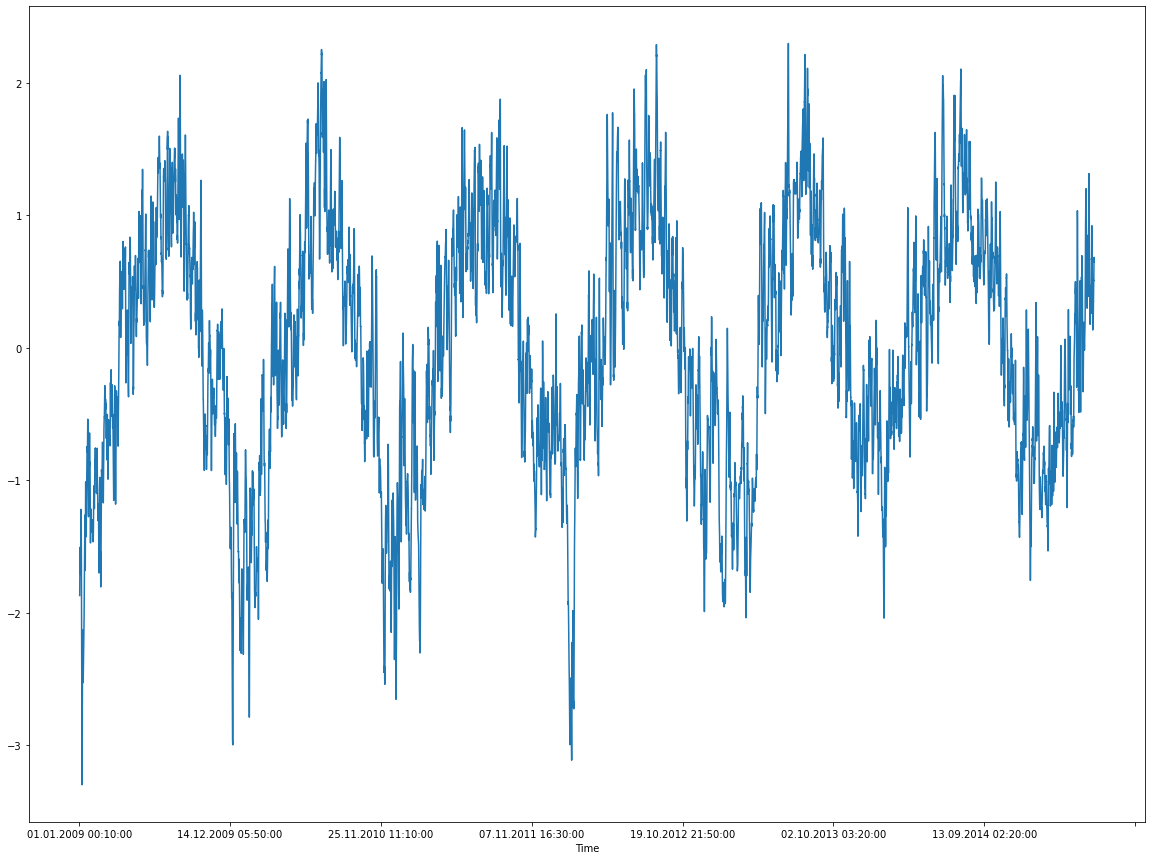

In [15]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = df_ts.Temperature.rolling(window=144).mean()
temp_df_mean.plot(figsize=(20,15))

In [16]:
print(temp_df_mean.shape)

(336440,)


<AxesSubplot:xlabel='Time'>

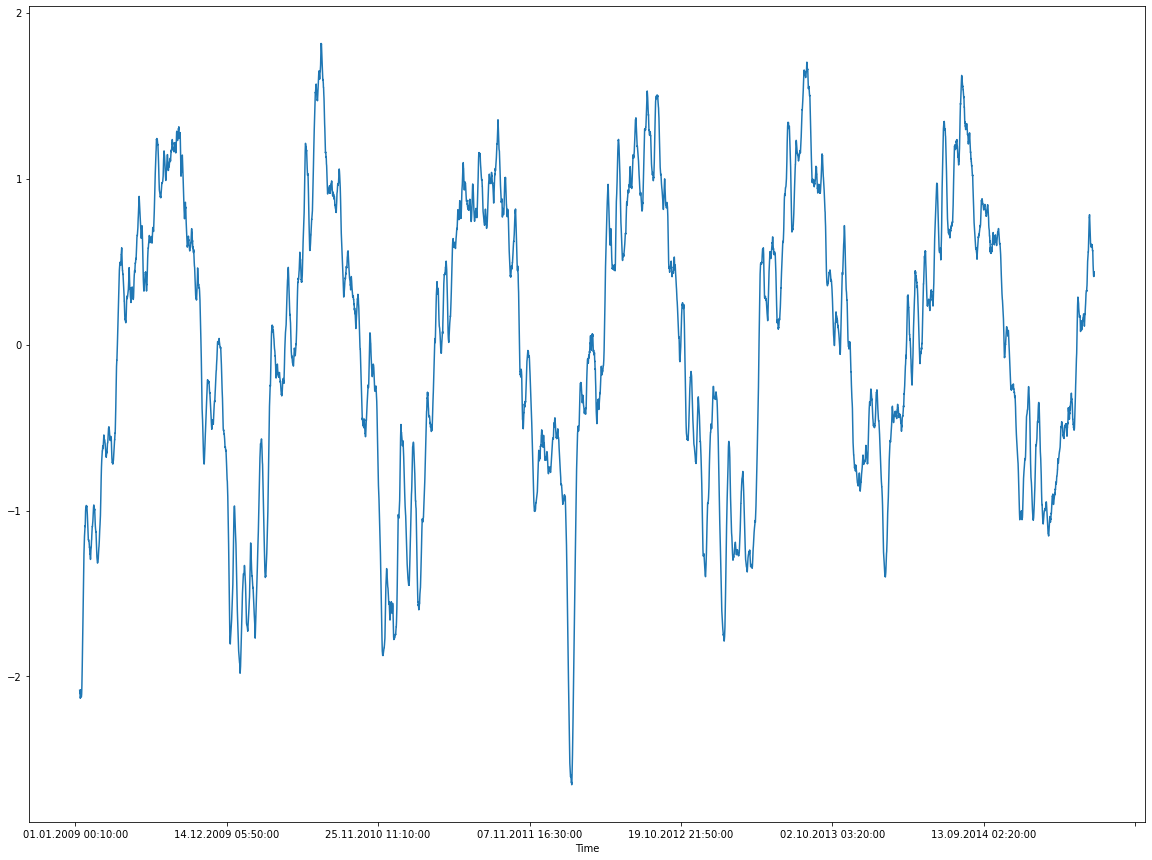

In [18]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = df_ts.Temperature.rolling(window=1440).mean()
temp_df_mean.plot(figsize=(20,15))

By taking a look both at the original and smoothed time series, it is direct to identify the seasonality among the considered time interval. Therefore, as a first approach over the time series, we may be considering a differential of lag 1 year. 

This is, let $X_t$ be the initial time series, we may consider the corresponding differentiation using the backward operator as follows:

$$
Y_t = \nabla_T X_t = X_t - B^T X_t = X_t - X_{t-T}
$$

for $T= 52560$. 

To differentiate a time series at a lag T = 52560 we can use the `numpy` library to calculate the difference between the current observation X_t and the observation T time steps ago, X_{t-T} with the following code lines:

In [19]:
import numpy as np

T= 52560 
x_temp_diff = x_temp - np.roll(x_temp, T)

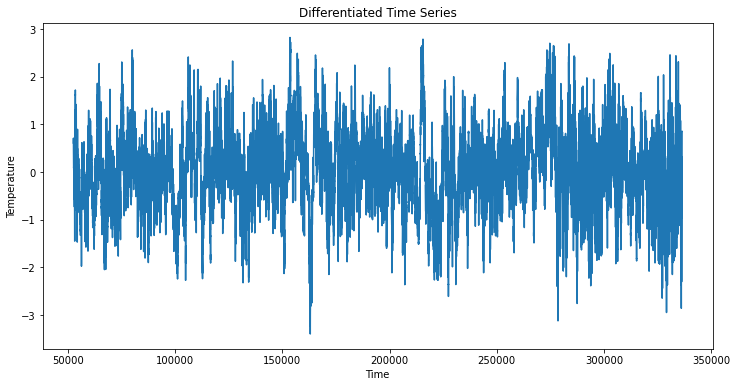

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff[T:])
plt.title('Differentiated Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Observe however that, as studied on the theoretical lectures there are multiple ways of identifying cycles, in this case, seasonal behaviors, other than differentiating, as aforementioned. An alternative way may be using a filter, such as the moving average of order given by the period of the cycle. Thus observe that by considering the corresponding sliding window given by a convolution along the time series we also erase the seasonality of the time series.

Notice moreover, that when considering the moving average filtering an increasing trend arises over the time series. Additionally, notice that when considering the moving average, we also remove the noise on the time series, obtainind a smoother dataset, losing the stochastic behavior caracteristic from the time series. 

<AxesSubplot:xlabel='Time'>

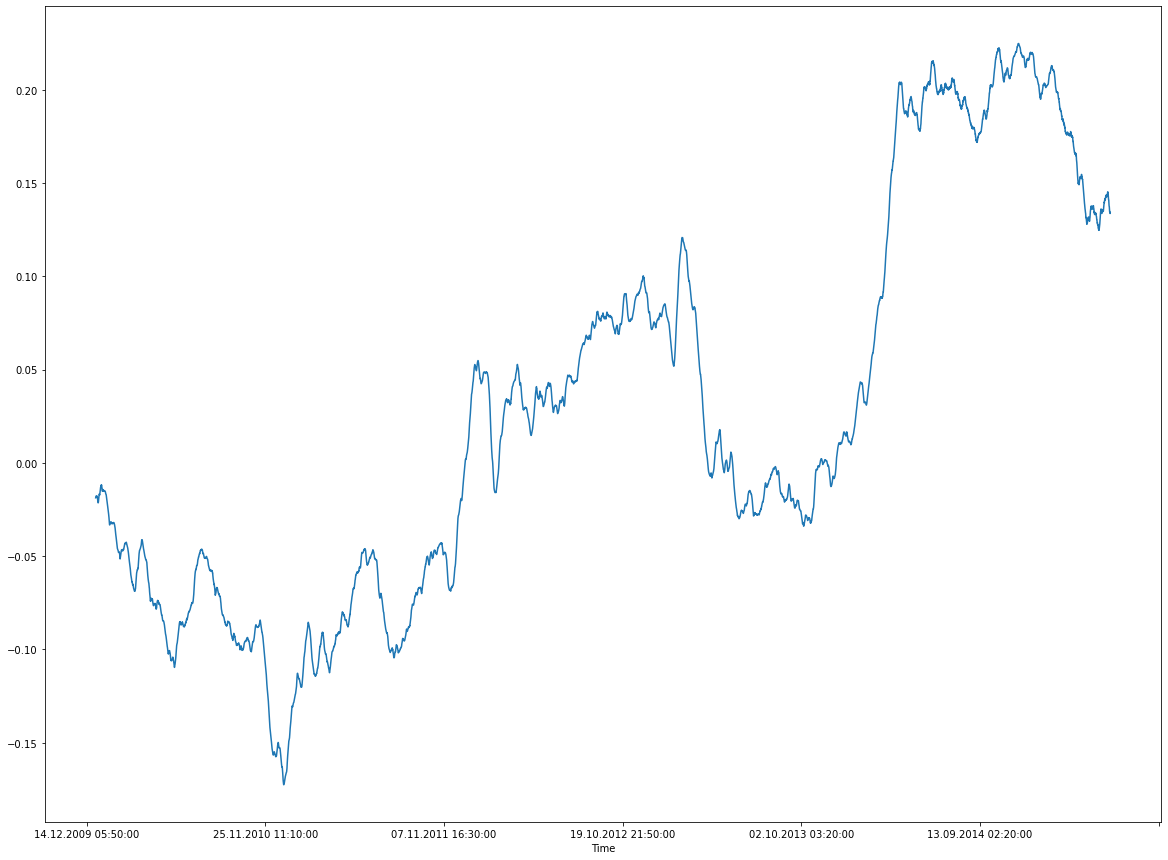

In [21]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = df_ts.Temperature.rolling(window=T).mean()
temp_df_mean.plot(figsize=(20,15))

Let us therefore, use the differentiated time series to study the origin of this trend, since it could be provided by a deterministic trend, by a stochastic trend, proper from a random walk, or even by an Autoregressive model of order 1. Thus, let us consider the corresponding tests and analysis over the differentiated time series.

Now we can compute the corresponding analysis over the differentiated time series. 

First of all we may consider a general analysis over the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) significant lags. I onrder to visualize those plots in Python, we may use the `plot_acf()` and `plot_pacf()` functions from the `statsmodels.graphics.tsaplots` module as follows: 

<Figure size 864x432 with 0 Axes>

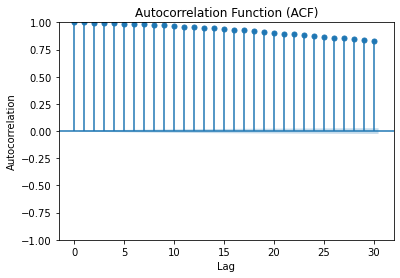

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(x_temp_diff[T:], lags=30)  # Specify the number of lags to show
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 864x432 with 0 Axes>

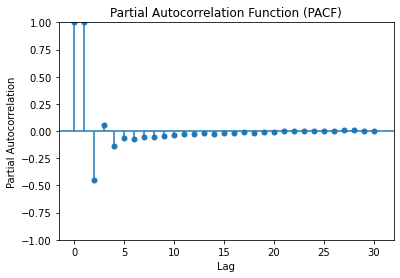

In [23]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(x_temp_diff[T:], lags=30, method = 'ywm')  # Specify the number of lags to show
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In order to fit a right ARIMA model, observe that unfortunately, Python's `statsmodels` library does not have an equivalent `auto.arima()` function like the one available in R's `forecast` package. However, I may try to implement an automate algorithm of determining the optimal ARIMA model order using Python by iterating over different combinations of orders and selecting the model with the best fit based on a chosen criterion (e.g., AIC, BIC). The corresponding implementation is conducted as follows: 

In [65]:
from statsmodels.tsa.arima.model import ARIMA

p = 0
q = 2
d = 0

model = ARIMA(x_temp_diff[T:], order=(p, d, q))
result = model.fit()

# Calculate the chosen metric (e.g., AIC, BIC)
metric = result.aic  

print(metric)
print(model.order)

/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-35528.35831663628
(0, 0, 2)


In [61]:
result.params

ar.L1     0.372030
ma.L1    -0.940431
sigma2    0.001159
dtype: float64

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      1   No. Observations:               283880
Model:                 ARIMA(1, 2, 1)   Log Likelihood              556666.331
Date:                Thu, 22 Jun 2023   AIC                       -1113326.661
Time:                        18:09:51   BIC                       -1113294.992
Sample:                             0   HQIC                      -1113317.480
                             - 283880                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3720      0.001    313.749      0.000       0.370       0.374
ma.L1         -0.9404      0.001  -1596.057      0.000      -0.942      -0.939
sigma2         0.0012   1.37e-06    845.983      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 587.34   Jarque-Bera (JB):            811561.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, we can compute the corresponding predictions, and compute the MSE as a metrics criterion in order to validate the difference between the forecasted models over the validation set, after computing the corresponding differentiation: 

<AxesSubplot:>

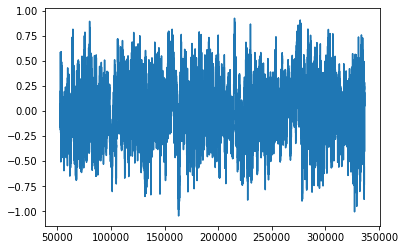

In [28]:
result.resid.plot()

In [30]:
result.mse

0.051661122557923045

Let us compute the normality test over the results in order to study the validity of the fitting:

In [32]:
import numpy as np
from scipy import stats

k2, p = stats.normaltest(result.resid)
alpha = 1e-3
print("p = {:g}".format(p))
#p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.12495e-272
The null hypothesis can be rejected


Then the obtained results are not coherent satisfactory enough. 

In [66]:
xx_temp = val_data[1]
print(xx_temp.shape)

forecast_length = xx_temp.shape[0] - T
# ARIMA model
forecast = result.forecast(steps=forecast_length)

(84111,)


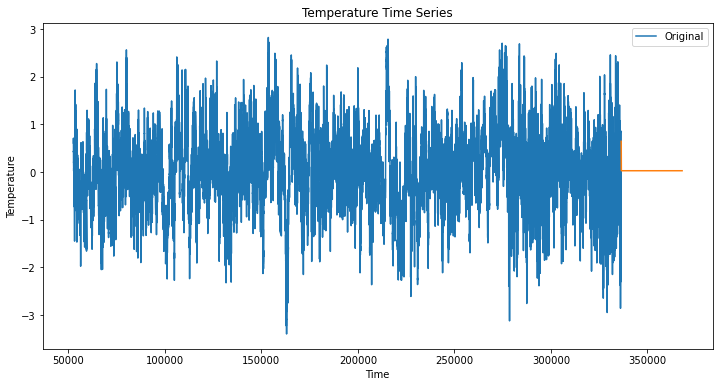

In [67]:
import matplotlib.pyplot as plt

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(x_temp_diff[T:], label='Original')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.legend()

# Plot the forecasted values
plt.plot(forecast.index, forecast.values, label='Forecast')

# Show the plot
plt.show()

In [76]:
print(len(forecast.values))
forecast.values

31551


array([0.64529844, 0.22726103, 0.02828988, ..., 0.02828988, 0.02828988,
       0.02828988])

In [77]:
print(len(x_temp_diff[-forecast_length:].values))
x_temp_diff[-forecast_length:].values

31551


array([0.63975948, 0.62198838, 0.60895624, ..., 0.85064316, 0.84945842,
       0.85419738])

In [79]:
print(np.linalg.norm(forecast.values-x_temp_diff[-forecast_length:].values))
print((forecast.values[0] - x_temp_diff[-forecast_length:].values[0])**2)

143.4203406727359
3.068007818228851e-05


In [25]:
from statsmodels.tsa.arima.model import ARIMA
# Define the range of orders to iterate over
p_values = range(0, 3)  # AR order
d_values = range(0, 2)  # I order
q_values = range(0, 3)  # MA order

# Initialize variables to store best model and its corresponding metric
best_model = None
best_metric = float('inf')  # Initialize with a high value (e.g., AIC, BIC)

# Iterate over different combinations of orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit the ARIMA model
                print('ARIMA model parameters, (p,d,q)=', p,d,q)
                model = ARIMA(x_temp_diff[T:], order=(p, d, q))
                result = model.fit()

                # Calculate the chosen metric (e.g., AIC, BIC)
                metric = result.aic  
                
                # We can for instance replace with result.bic for BIC

                # Update the best model and metric if necessary
                if metric < best_metric:
                    best_model = result
                    best_metric = metric

            except:
                continue

# Use the best model for further analysis


ARIMA model parameters, (p,d,q)= 0 0 0
ARIMA model parameters, (p,d,q)= 0 0 1


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA model parameters, (p,d,q)= 0 0 2


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA model parameters, (p,d,q)= 0 1 0
ARIMA model parameters, (p,d,q)= 0 1 1
ARIMA model parameters, (p,d,q)= 0 1 2
ARIMA model parameters, (p,d,q)= 1 0 0
ARIMA model parameters, (p,d,q)= 1 0 1
ARIMA model parameters, (p,d,q)= 1 0 2
ARIMA model parameters, (p,d,q)= 1 1 0
ARIMA model parameters, (p,d,q)= 1 1 1
ARIMA model parameters, (p,d,q)= 1 1 2


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA model parameters, (p,d,q)= 2 0 0
ARIMA model parameters, (p,d,q)= 2 0 1
ARIMA model parameters, (p,d,q)= 2 0 2


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA model parameters, (p,d,q)= 2 1 0
ARIMA model parameters, (p,d,q)= 2 1 1


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA model parameters, (p,d,q)= 2 1 2


/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
print(best_model.model.order)
print(best_metric)

(1, 1, 2)
-1125099.2870158616


In [27]:
print(best_model.params)

ar.L1     0.941282
ma.L1    -0.471613
ma.L2    -0.339219
sigma2    0.001113
dtype: float64


In [80]:
## In order not to run again the code: 

from statsmodels.tsa.arima.model import ARIMA

p = 0
q = 1
d = 2

model = ARIMA(x_temp_diff[T:], order=(p, d, q))
result = model.fit()

# Calculate the chosen metric (e.g., AIC, BIC)
metric = result.aic  

print(metric)
print(model.order)

-1083833.698655901
(0, 2, 1)


In [34]:
print(result.params)
result.summary()

ma.L1    -0.813256
sigma2    0.001286
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      1   No. Observations:               283880
Model:                 ARIMA(0, 2, 1)   Log Likelihood              541918.849
Date:                Wed, 21 Jun 2023   AIC                       -1083833.699
Time:                        23:50:00   BIC                       -1083812.586
Sample:                             0   HQIC                      -1083827.578
                             - 283880                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8133      0.001  -1255.537      0.000      -0.815      -0.812
sigma2         0.0013    1.5e-06    855.922      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):               19118.73   Jarque-Bera (JB):            868570.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
import numpy as np
from scipy import stats

k2, p = stats.normaltest(result.resid)
alpha = 1e-3
print("p = {:g}".format(p))
#p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


0.0012880149203345183


<AxesSubplot:>

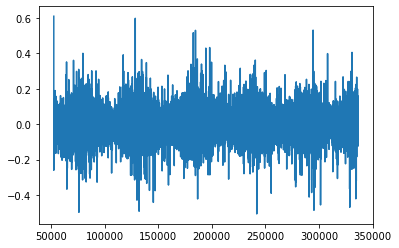

In [35]:
print(result.mse)
result.resid.plot()

In [37]:
## In order not to run again the code: 

from statsmodels.tsa.arima.model import ARIMA

p = 1
q = 1
d = 2

model = ARIMA(x_temp_diff[T:], order=(p, d, q))
result = model.fit()

# Calculate the chosen metric (e.g., AIC, BIC)
metric = result.aic  

print(metric)
print(model.order)

-1113326.661155228
(1, 2, 1)


In [38]:
import numpy as np
from scipy import stats

k2, p = stats.normaltest(result.resid)
alpha = 1e-3
print("p = {:g}".format(p))
#p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


0.0011610588615440728


<AxesSubplot:>

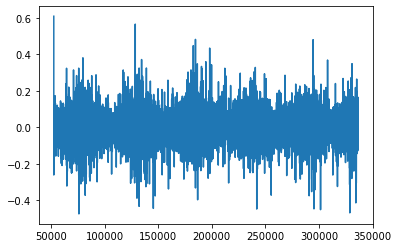

In [39]:
print(result.mse)
result.resid.plot()

In [1]:
## Directly SARIMA model
#from statsmodels.tsa.statespace.sarimax import SARIMAX
# We have seasonal data!
#model = SARIMAX(x_temp_diff[T:],order=(0,1,0), seasonal_order=(0,0,2,T))
#results = model.fit()
#print(results.summary())

<AxesSubplot:>

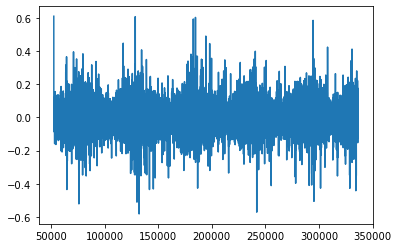

In [18]:
results.resid.plot()

# Multivariate

In [11]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

train_data

,0,1,2,3,4,5,6
0,0.920682,-2.014960,-1.315987,-0.782129,-1.493220,2.243871,-0.727998
1,0.926670,-2.061164,-1.329360,-0.784270,-1.512196,2.294955,-0.929488
2,0.921879,-2.073012,-1.332035,-0.786410,-1.515992,2.305920,-1.273970
3,0.919484,-2.049317,-1.325348,-0.788551,-1.500811,2.279754,-1.176475
4,0.919484,-2.044578,-1.324011,-0.788551,-1.500811,2.275020,-1.189475
...,...,...,...,...,...,...,...
336435,0.137404,1.085504,1.029669,1.110216,0.597983,-0.976454,-0.468012
336436,0.138602,1.073657,1.012283,1.103794,0.575211,-0.964991,-0.598005
336437,0.139799,1.059440,0.990886,1.078106,0.567621,-0.952033,-0.370517
336438,0.137404,1.035745,0.956116,1.011745,0.579007,-0.933094,-0.058533


In [12]:
model = VAR(train_data)


In [15]:
model

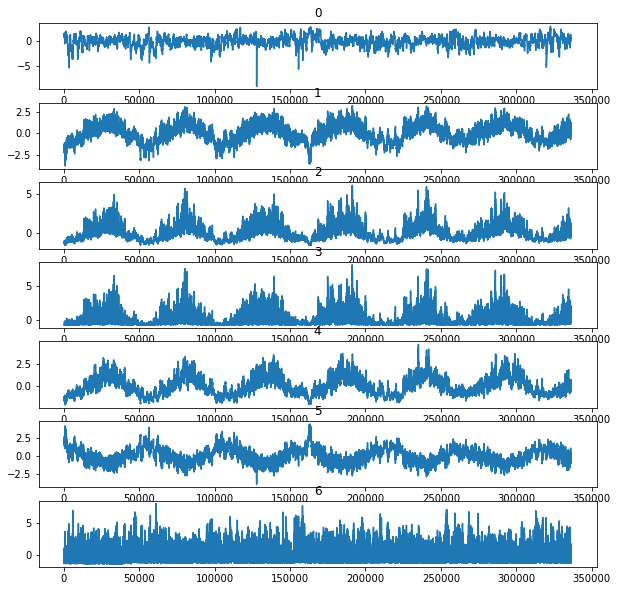

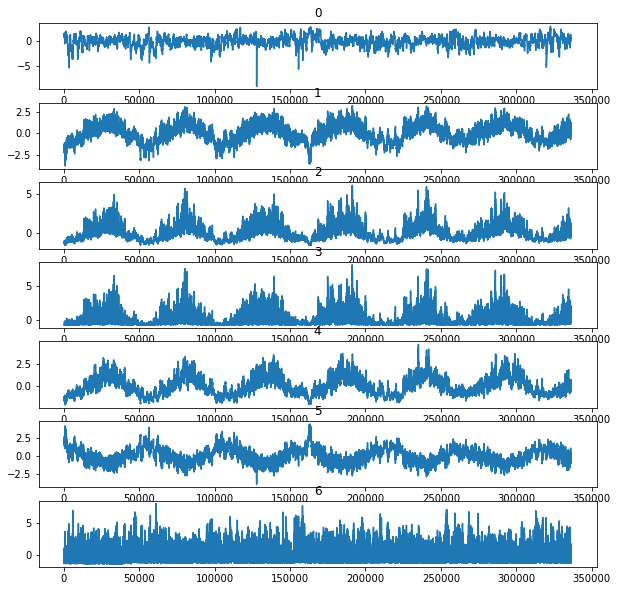

In [16]:
results_var = model.fit(maxlags=2, ic='aic')
results_var.plot()

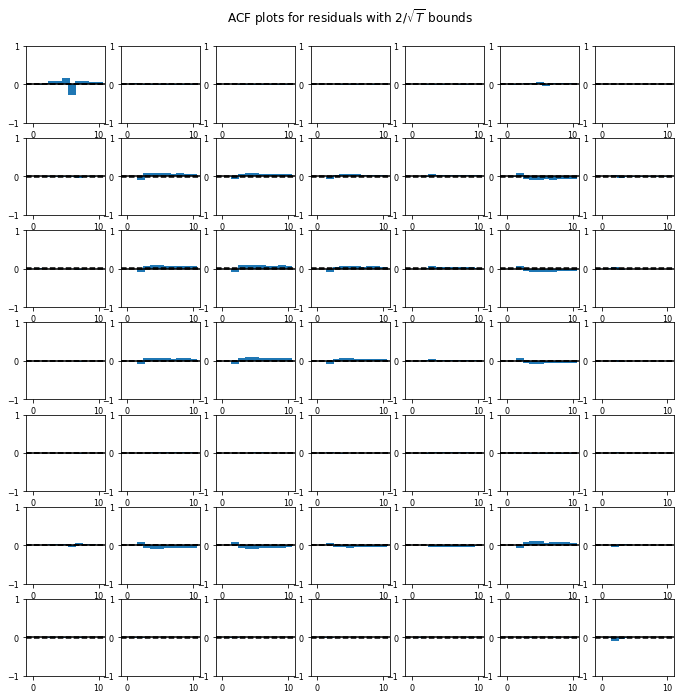

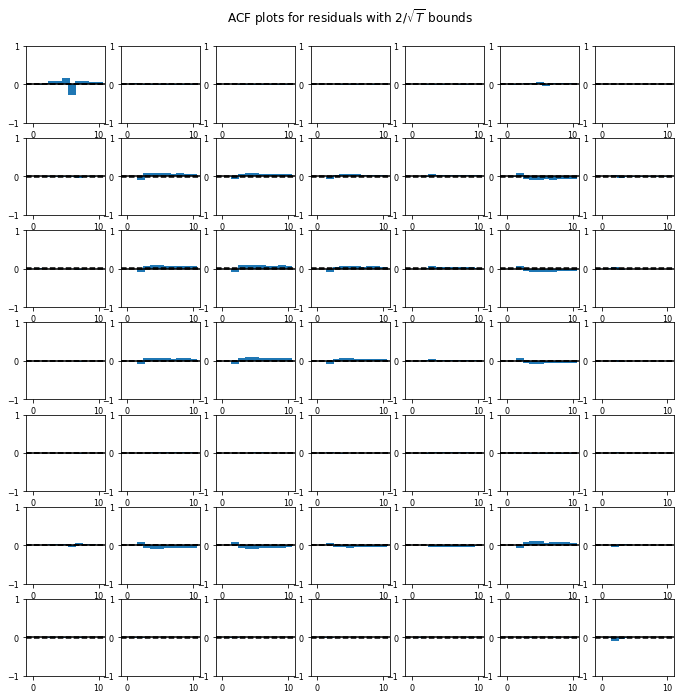

In [47]:
results_var.plot_acorr()

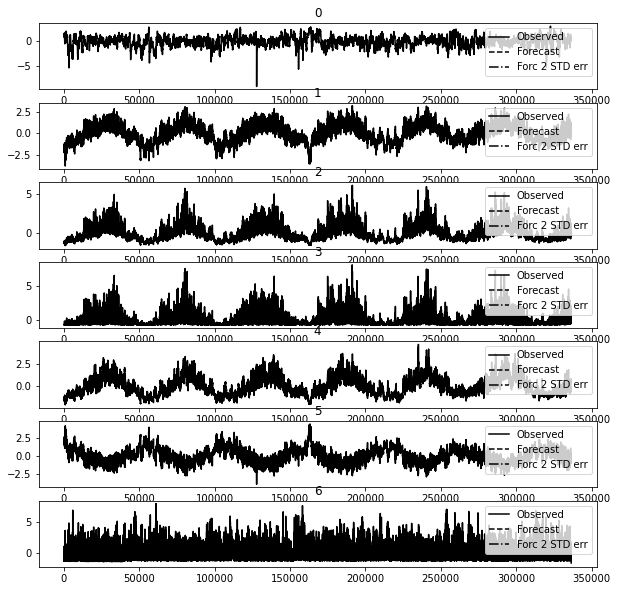

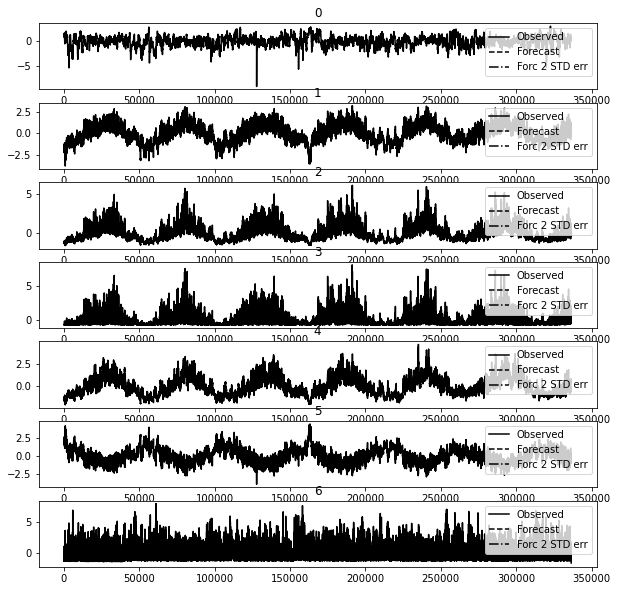

In [48]:
results_var.plot_forecast(10)

In [17]:
results_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Jun, 2023
Time:                     18:28:15
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -60.4764
Nobs:                     336438.    HQIC:                  -60.4788
Log likelihood:       6.83226e+06    FPE:                5.41957e-27
AIC:                     -60.4798    Det(Omega_mle):     5.41788e-27
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.000001         0.000034           -0.037           0.970
L1.0          0.799238         0.012555           63.659           0.000
L1.1          1.830279         0.050671           36.121           0.000
L1.2         -0.399610 

Forecast errors of component j on k in an i-step ahead forecast can be decomposed using the orthogonalized impulse responses. 

In [18]:
fevd = results_var.fevd(5)
fevd.summary()

FEVD for 0
            0         1         2         3         4         5         6
0    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1    0.997870  0.000495  0.000004  0.000004  0.000158  0.001458  0.000011
2    0.995779  0.001168  0.000005  0.000002  0.000224  0.002813  0.000008
3    0.994109  0.001835  0.000006  0.000005  0.000321  0.003716  0.000008
4    0.992791  0.002455  0.000008  0.000014  0.000409  0.004302  0.000020

FEVD for 1
            0         1         2         3         4         5         6
0    0.005078  0.994922  0.000000  0.000000  0.000000  0.000000  0.000000
1    0.009720  0.988017  0.000329  0.000059  0.000009  0.000008  0.001858
2    0.012747  0.984053  0.000884  0.000089  0.000025  0.000006  0.002194
3    0.014680  0.981607  0.001455  0.000128  0.000050  0.000004  0.002076
4    0.015929  0.980041  0.001970  0.000174  0.000081  0.000004  0.001801

FEVD for 2
            0         1         2         3         4         5         6
0  

In [21]:
results_var.resid[1]

2         0.013510
3         0.028116
4        -0.008048
5         0.023163
6         0.035840
            ...   
336435    0.008074
336436   -0.011895
336437   -0.006635
336438   -0.012677
336439   -0.003150
Name: 1, Length: 336438, dtype: float64

In [56]:
np.mean(results_var.resid[1])

1.5885846837501286e-16

In [59]:
results_var.mse

<bound method VARProcess.mse of <statsmodels.tsa.vector_ar.var_model.VARResults object at 0x7fc84f7b4f40>>

In [23]:
import numpy as np
from scipy import stats

k2, p = stats.normaltest(results_var.resid[1])
alpha = 1e-3
print("p = {:g}".format(p))
#p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [25]:
val_data

,0,1,2,3,4,5,6
336440,0.135009,1.003757,0.910647,0.900431,0.620755,-0.908424,-0.266522
336441,0.124230,0.991910,0.893262,0.874743,0.620755,-0.900699,-0.416014
336442,0.121834,0.967030,0.858492,0.816945,0.620755,-0.880265,-1.046482
336443,0.123032,0.939781,0.821047,0.754866,0.620755,-0.856592,-1.247972
336444,0.125427,0.912532,0.783602,0.682084,0.635936,-0.833417,-0.955487
...,...,...,...,...,...,...,...
420546,1.345855,-1.544618,-1.156846,-0.568063,-1.447677,1.875812,-0.961986
420547,1.329088,-1.461686,-1.123413,-0.520968,-1.443881,1.787598,-0.656502
420548,1.315913,-1.439176,-1.114052,-0.497421,-1.451472,1.761432,-0.695500
420549,1.314716,-1.565943,-1.164870,-0.559500,-1.474244,1.890265,-0.429014


In order to forecast, the VAR model expects up to the lag order number of observations from the past data.

This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [47]:
# Get the lag order
lag_order = results_var.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_data.values[-lag_order:]
forecast_input

2


array([[ 0.13740403,  1.03574539,  0.95611605,  1.0117454 ,  0.57900672,
        -0.93309405, -0.0585325 ],
       [ 0.13620635,  1.01678955,  0.9293697 ,  0.93468158,  0.61695959,
        -0.91889004, -0.5070096 ]])

In [48]:
fc = results_var.forecast(y = forecast_input, steps = 2) # steps=T)

In [49]:
df_forecast = pd.DataFrame(fc, index=df.index[-2:]) #, columns=df.columns + '_2d')
df_forecast

,0,1,2,3,4,5,6
336438,0.135331,1.008007,0.916941,0.904403,0.629128,-0.912136,-0.425226
336439,0.134904,1.001157,0.907658,0.885826,0.633206,-0.906516,-0.410308


In [53]:
(1.008007 - 1.03574539)**2

0.0007694182797920939

In [33]:
print(pd.DataFrame(df).columns)
print(df.columns)
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    print(col)
    

RangeIndex(start=0, stop=7, step=1)
RangeIndex(start=0, stop=7, step=1)
0
1
2
3
4
5


## Resevoir computing

In [61]:
from pyrcn.datasets import mackey_glass
from pyrcn.echo_state_network import ESNRegressor

X, y = mackey_glass(n_timesteps=20000)



In [62]:
X.shape

(20000,)

In [65]:
#reg = ESNRegressor()
#reg.fit(X=X[:8000], y=y[:8000])

#y_pred = reg.predict(X[8000:])  # output is the prediction for each input example

## Kalman Filter

In [67]:
#pip install filterpy

     |████████████████████████████████| 177 kB 2.5 MB/s eta 0:00:01
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=4416ca3a6d0a35baf6856f2696bf5da24599d9adc5bbede551bd5ce4786248e8
  Stored in directory: /Users/flaviaferrusmarimon/Library/Caches/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy
Note: you may need to restart the kernel to use updated packages.


First construct the object with the required dimensionality.

In [68]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)

In [69]:
f.x = np.array([[2.],    # position
                [0.]])   # velocity


In [70]:
#f.x = np.array([2., 0.])

In [71]:
f.F = np.array([[1.,1.],
                [0.,1.]])

In [72]:
f.H = np.array([[1.,0.]])

In [73]:
f.P *= 1000.

In [74]:
#f.P = np.array([[1000.,    0.],
#                [   0., 1000.] ])

In [75]:
f.R = 5

In [76]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [77]:
z = get_sensor_reading()
f.predict()
f.update(z)

NameError: name 'get_sensor_reading' is not defined

In [78]:
while True:
    z, R = read_sensor()
    x, P = predict(x, P, F, Q)
    x, P = update(x, P, z, R, H)

NameError: name 'read_sensor' is not defined